## Crop Recommendation using Kmeans Clustering algorithm 

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
#%matplotlib inline

### Importing Dataset

In [2]:
data = pd.read_csv("Crop_recommendation.csv")
X = data.iloc[:, 0:3].values

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Using the elbow method to find the optimal number of clusters

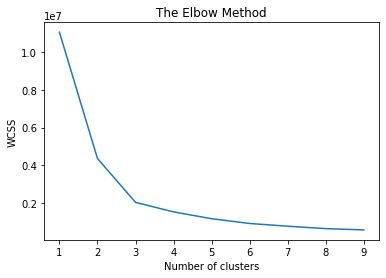

In [5]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###  From the above elbow we can clearly depict that the optimal no of clusters is either 2.

### Finding Silhouette score to get the accurate no of clusters

In [6]:
sil_score = []
n_cluster = []
for i in range(2, 10):
    test_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    test_kmeans.fit(X)
    test_labels = test_kmeans.predict(X)
    n_cluster.append(i)
    sil_score.append(metrics.silhouette_score(X,test_labels))
data_dict = {"No of clusters": n_cluster, "Silhouette_Score": sil_score}
accuracy = pd.DataFrame(data_dict)
accuracy   

,No of clusters,Silhouette_Score
0,2,0.713483
1,3,0.509070
2,4,0.449660
3,5,0.458936
4,6,0.445836
5,7,0.462328
6,8,0.481288
7,9,0.436178


### Training the Kmeans model on Dataset for K=2

In [7]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

### Visualizing the clusters using 3D scatter plot

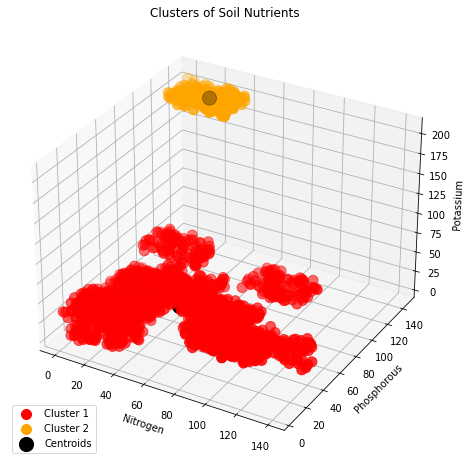

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[labels==0, 0], X[labels==0, 1], X[labels==0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(X[labels==1, 0], X[labels==1, 1], X[labels==1, 2], s=100, c='orange', label='Cluster 2')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='black', label='Centroids')
ax.set_title('Clusters of Soil Nutrients')
ax.set_xlabel('Nitrogen')
ax.set_ylabel('Phosphorous')
ax.set_zlabel('Potassium')
#legend.loc()
plt.legend(loc="lower left")
plt.show()


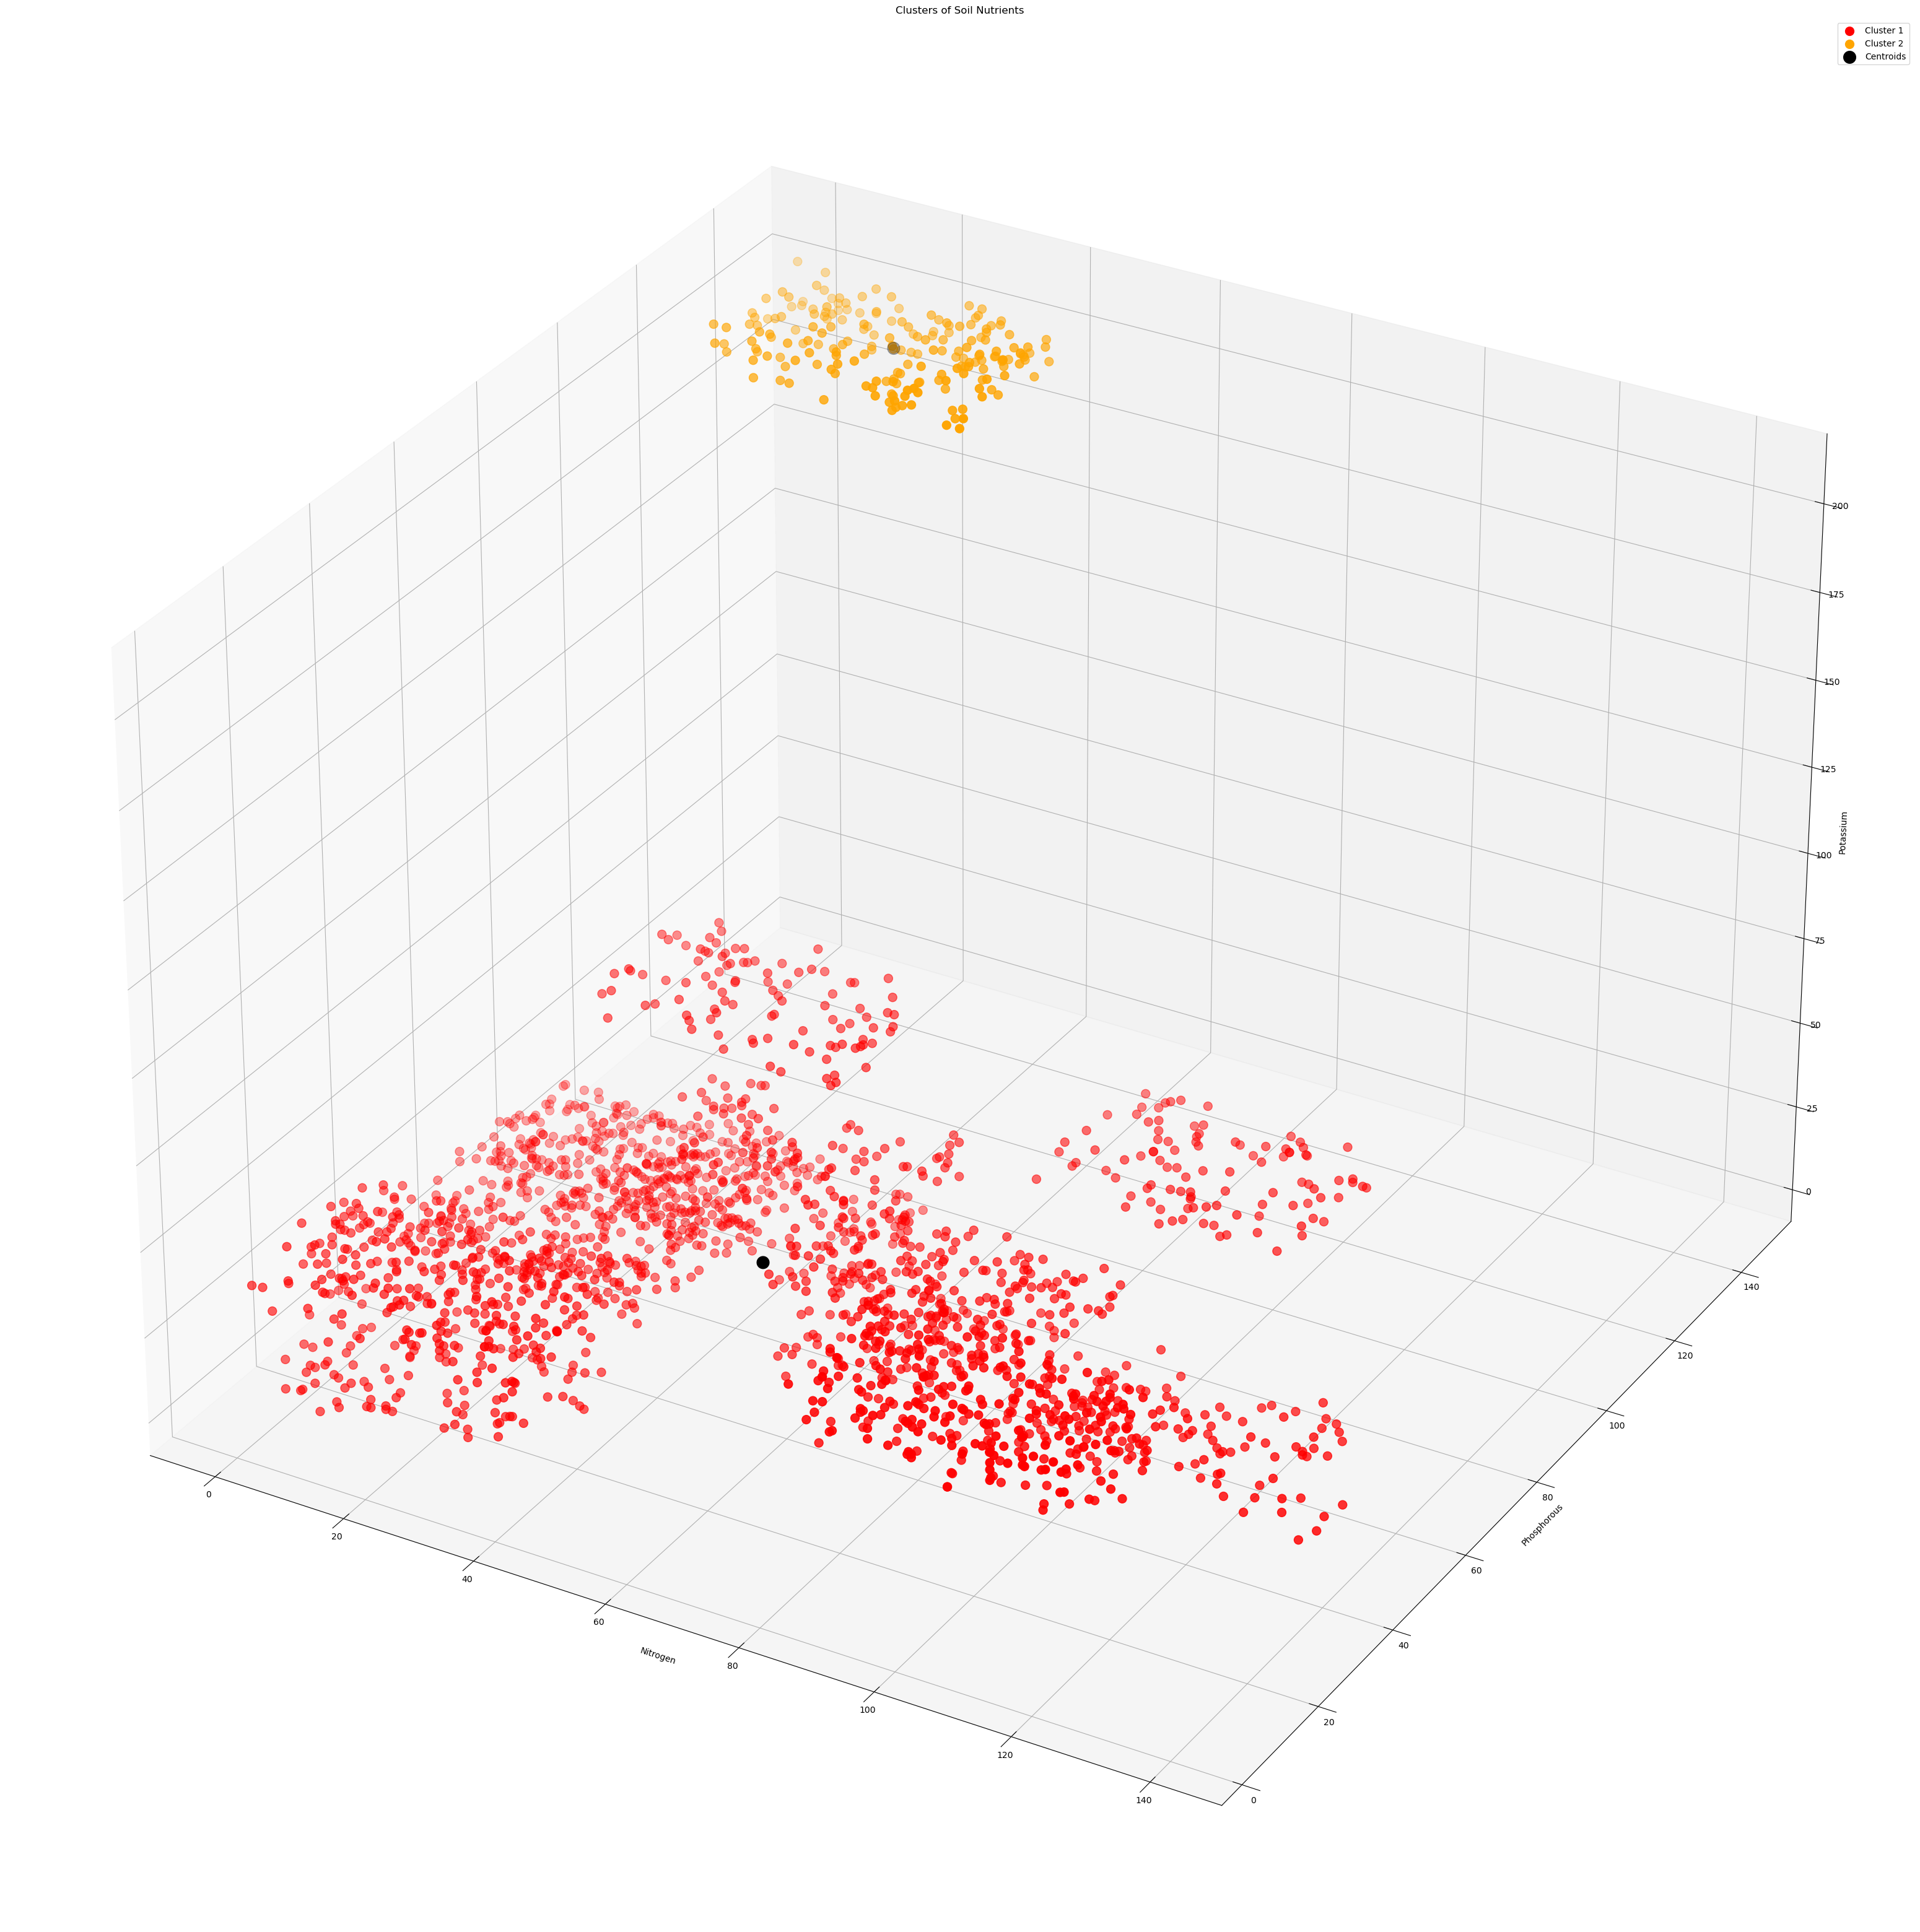

In [32]:
fig = plt.figure(figsize=(50,40))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[labels==0, 0], X[labels==0, 1], X[labels==0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(X[labels==1, 0], X[labels==1, 1], X[labels==1, 2], s=100, c='orange', label='Cluster 2')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='black', label='Centroids')
ax.set_title('Clusters of Soil Nutrients')
ax.set_xlabel('Nitrogen')
ax.set_ylabel('Phosphorous')
ax.set_zlabel('Potassium')
#legend.loc()
plt.legend()
plt.show()


### Adding the 'Cluster' column to dataset to predict the crops for given nutrients value  

In [11]:
data['Clusters'] = labels
cluster1 = []
cluster2 = []
for i in range(len(data)):
    if data.iloc[i,8]==0:
        cluster1.append(i)
    else:
        cluster2.append(i)
crop_1 = np.unique(data.iloc[cluster1,7].values)
crop_2 = np.unique(data.iloc[cluster2,7].values)
print(crop_1)
print(crop_2)
 


['banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton' 'jute'
 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans' 'mungbean' 'muskmelon'
 'orange' 'papaya' 'pigeonpeas' 'pomegranate' 'rice' 'watermelon']
['apple' 'grapes']


### Graphical User Interface using Tkinter library

In [ ]:
import tkinter as tk
from sklearn.cluster import KMeans

# Function to recommend crop based on nutrient values
def recommend_crop(nitrogen, phosphorus, potassium):
    nutrient_values = np.array([nitrogen, phosphorus, potassium]).reshape(1,-1)
    predicted_clusters = kmeans.predict(nutrient_values)
    if predicted_clusters[0] == 0:
        return crop_1
    elif predicted_clusters[0] == 1:
        return crop_2
    else:
        return "Unable to predict crops according to given values"

# Create Tkinter GUI
root = tk.Tk()
root.title("Crop Recommendation")

# Set window size and position
window_width = 400
window_height = 200
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x = (screen_width // 2) - (window_width // 2)
y = (screen_height // 2) - (window_height // 2)
root.geometry('{}x{}+{}+{}'.format(window_width, window_height, x, y))

# Create label and entry widgets for nutrient values
tk.Label(root, text="Nitrogen:").grid(row=0, column=0)
nitrogen_entry = tk.Entry(root)
nitrogen_entry.grid(row=0, column=1)

tk.Label(root, text="Phosphorus:").grid(row=1, column=0)
phosphorus_entry = tk.Entry(root)
phosphorus_entry.grid(row=1, column=1)

tk.Label(root, text="Potassium:").grid(row=2, column=0)
potassium_entry = tk.Entry(root)
potassium_entry.grid(row=2, column=1)

# Function to handle button click and recommend crop
def recommend():
    nitrogen = float(nitrogen_entry.get())
    phosphorus = float(phosphorus_entry.get())
    potassium = float(potassium_entry.get())
    crop = recommend_crop(nitrogen, phosphorus, potassium)
    recommendation_label.config(text="Recommended crop: {}".format(crop))

# Create button widget to recommend crop
recommend_button = tk.Button(root, text="Recommend Crop", command=recommend)
recommend_button.grid(row=3, column=1)

# Create label widget to display crop recommendation
recommendation_label = tk.Label(root, text="")
recommendation_label.grid(row=4, column=1)

root.mainloop()
